    Pipeline Used:
       Stopwords-number removal 
       Lemmatizing 
       TF/IDF
       Feature selection Kbest
       Many algorithms.
    

In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC 
import os
import pickle

In [2]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC #support vector classifier
from sklearn.linear_model import SGDClassifier
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')
import os

# Import data

In [6]:
path=os.getcwd()
new_path=path.replace("2nd Pipeline notebooks","Data to use\\movie_data.csv")
new_path
df=pd.read_csv(new_path)


In [11]:
df.head()


,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [12]:
labels=df["sentiment"].copy() #capture targets
#df.drop(["Title","Sub-Domain","Domain","Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1","Unnamed: 0.1.1.1"],axis=1,inplace=True)
#"Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1"
print(df.columns)#
print(labels)

Index(['review', 'sentiment'], dtype='object')
0        1
1        0
2        0
3        1
4        0
5        1
6        1
7        1
8        1
9        1
10       0
11       1
12       0
13       0
14       1
15       0
16       0
17       1
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       1
        ..
49970    1
49971    0
49972    1
49973    1
49974    0
49975    1
49976    0
49977    1
49978    0
49979    1
49980    0
49981    0
49982    0
49983    1
49984    0
49985    0
49986    0
49987    0
49988    0
49989    0
49990    0
49991    0
49992    0
49993    1
49994    1
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 50000, dtype: int64


In [13]:
print(df.columns)#
print(labels.unique())
print(labels.nunique())

Index(['review', 'sentiment'], dtype='object')
[1 0]
2


# Process text data

In [14]:
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


# 1)Stopword removal

In [15]:
stop=stopwords.words('english') #Nltk stopwords
print(stop)
stop.append("Hi")  
stop.append("Hello")
stop.append("Hiya")
stop.append("hello")
stop.append("Anyone")
stop.append("All")
stop.append("I")
stop.append("hi")
stop.append("this")
stop.append("My")
stop.append("Everyone")
stop.append("everyone")
stop.append("Me")
stop.append("Im")
stop.append("Ive")
stop.append("We")
stop.append("thank")
stop.append("Thank")
stop.append("Would")
stop.append("would")
stop.append("Afternoon")
stop.append("There")
len(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

201

In [16]:
def is_number(s):  #Function helps removing numbers
    try:
        float(s)
        return True
    except ValueError:
        return False

In [17]:
#Define text-processing functions
translator = str.maketrans('', '', string.punctuation)
def tokenize(text):
    new_text=text.translate(translator)
    return [word for word in new_text.split()]

def stop_word_remove(text):
    return [w for w in tokenize(text) if w not in stop]



discarded_words=[]            
def stop_word_remove_and_numbers(text):
    list_of_tokens=tokenize(text) #Tokenize the string that came in as a string
    return_list=[]  #list to return 
    for token in list_of_tokens:
        if token.lower() not in stop and is_number(token)==False:
            return_list.append(token)
        else:
            #print(token)
            discarded_words.append(token)
    #return [w for w in tokenize(text) if w not in stop]
    return return_list 
    

In [18]:
intermidiate_frame=df["review"].apply(stop_word_remove_and_numbers)

# 2) Lemmatizing

In [19]:


def lemmatize(text): #SpaCy
    "Accepts string as input"
    
    joined=" ".join(text)
 
    return [token.lemma_ for token in nlp(joined)]
 

In [20]:
processed_Dataframe=intermidiate_frame.apply(lemmatize)
processed_Dataframe

0        [teenager, Martha, Moxley, Maggie, Grace, move...
1        [ok, really, like, Kris, Kristofferson, usual,...
2        [SPOILER, read, think, watch, movie, although,...
3        [people, see, wonderful, movie, -PRON-, be, su...
4        [recently, buy, dvd, forget, much, hate, movie...
5        [leave, Braik, put, good, show, finally, Zorak...
6        [Nathan, Detroit, Frank, Sinatra, manager, New...
7        [understand, Crash, Course, right, context, mu...
8        [-PRON-, have, impressed, Chavezs, stance, glo...
9        [movie, direct, Renny, Harlin, finnish, miracl...
10       [live, let, tell, do, not, foggyest, idea, hec...
11       [Hidden, Frontier, notable, longest, run, inte...
12       [ago, see, Sleuth, two, great, actor, Michael,...
13       [French, First, apparently, like, Jerry, Lewis...
14       [strange, movie, unlike, anything, make, west,...
15       [see, movie, strength, single, positive, revie...
16       [great, philosophical, question, purpose, life.

In [21]:
def join_to_string(text_list):
    return " ".join(text_list)

In [22]:
final_df=processed_Dataframe.apply(join_to_string)

In [23]:
final_df[0]

'teenager Martha Moxley Maggie Grace move highclass area Belle Greenwich Connecticut Mischief Night eve Halloween murder backyard house murder remain unsolved Twentytwo year later writer Mark Fuhrman Christopher Meloni former LA detective fall disgrace perjury OJ Simpson trial move Idaho decide investigate case partner Stephen Weeks Andrew Mitchell purpose write book local squirm welcome support retire detective Steve Carroll Robert Forster charge investigation 70 discover criminal net power money cover murderbr br Murder Greenwich good tv movie true story murder fifteen year old girl commit wealthy teenager whose mother Kennedy powerful rich family use influence cover murder twenty year however snoopy detective convict perjurer disgrace able disclose hideous crime commit screenplay show investigation Mark last day Martha parallel lack emotion dramatization vote sevenbr br Title Brazil available'

In [24]:
df["review"].iloc[0]

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

In [26]:
f_df=pd.DataFrame(final_df)

In [27]:
f_df.head()

,review
0,teenager Martha Moxley Maggie Grace move highc...
1,ok really like Kris Kristofferson usual easy g...
2,SPOILER read think watch movie although waste ...
3,people see wonderful movie -PRON- be sure thet...
4,recently buy dvd forget much hate movie versio...


In [28]:
f_df['sentiment']=labels.copy()

In [29]:
f_df.head()

,review,sentiment
0,teenager Martha Moxley Maggie Grace move highc...,1
1,ok really like Kris Kristofferson usual easy g...,0
2,SPOILER read think watch movie although waste ...,0
3,people see wonderful movie -PRON- be sure thet...,1
4,recently buy dvd forget much hate movie versio...,0


In [31]:
f_df.to_excel("processed_data.xlsx")

In [32]:
#save df
#final_df.to_excel("processed_data.xlsx")
final_df=pd.read_excel("processed_data.xlsx")
labels=final_df["sentiment"].copy()

# Transform to word vectors--count vectors

In [33]:
vectorizer=TfidfVectorizer()
X_train, X_test, y_train, y_test = train_test_split(final_df["review"], labels, test_size=0.20, random_state=1,stratify=labels)

In [34]:
vectors_train=vectorizer.fit_transform(X_train)

In [36]:
vectors_test=vectorizer.transform(X_test) 
#Sparse matrix
vectors_test

<10000x148593 sparse matrix of type '<class 'numpy.float64'>'
	with 940002 stored elements in Compressed Sparse Row format>

# Feature selection

In [37]:
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif

In [38]:
import scipy.sparse

In [39]:
selector=SelectKBest(mutual_info_classif, k=100)

reduced_vectors_train =selector.fit_transform(vectors_train, y_train)
print(reduced_vectors_train.shape)



(40000, 100)


In [40]:
reduced_vectors_train

<40000x100 sparse matrix of type '<class 'numpy.float64'>'
	with 939779 stored elements in Compressed Sparse Row format>

In [41]:
reduced_vectors_test =selector.transform(vectors_test)

In [42]:
reduced_vectors_test

<10000x100 sparse matrix of type '<class 'numpy.float64'>'
	with 234914 stored elements in Compressed Sparse Row format>

In [43]:
print(selector.get_support(indices=True))

[  2906   3136   3313   5737   7167   8769  10919  11079  12685  13022
  14569  17521  20743  21891  23134  26798  29378  32612  35822  36921
  41627  42070  43263  43317  43465  45040  46483  47233  47730  47990
  51142  52968  53639  53998  54457  55532  56766  58717  72047  74444
  75491  75735  76367  76921  77051  77334  77475  79207  79557  80056
  86665  87310  89783  89827  91609  91692  93547  93852  97190  98322
  98538 100420 100672 101001 103114 103888 105713 107008 107108 111014
 113685 114017 115514 115575 116873 118574 121834 124109 124264 124879
 125269 128776 129976 130662 131288 131369 131674 132325 135260 135576
 135952 139161 142055 142451 142693 143205 145460 145850 147120 147576]


In [44]:
a=selector.get_support(indices=True)

In [45]:
len(a)

100

In [46]:
feature_dict=vectorizer.vocabulary_

In [49]:
vectorizer.get_feature_names()[147120]

'year'

In [50]:
vectorizer.get_feature_names()[145850]

'work'

In [51]:
dict=np.asarray(vectorizer.get_feature_names())[selector.get_support()]
count_vectorizer=TfidfVectorizer(strip_accents='unicode', ngram_range=(1,1), binary=True,  vocabulary=dict)

In [52]:
count_vectorizer.vocabulary #most importan terms (100-terms vocabulary) 

array(['act', 'actor', 'actually', 'also', 'another', 'around', 'back',
       'bad', 'be', 'become', 'big', 'br', 'can', 'cast', 'character',
       'come', 'could', 'day', 'director', 'do', 'end', 'enough', 'even',
       'ever', 'every', 'fact', 'feel', 'film', 'find', 'first', 'funny',
       'get', 'give', 'go', 'good', 'great', 'guy', 'have', 'know',
       'leave', 'life', 'like', 'little', 'long', 'look', 'lot', 'love',
       'make', 'man', 'many', 'movie', 'much', 'never', 'new', 'not',
       'nothing', 'old', 'one', 'part', 'people', 'performance', 'play',
       'plot', 'point', 'pretty', 'pron', 'quite', 'real', 'really',
       'role', 'say', 'scene', 'see', 'seem', 'set', 'show', 'something',
       'star', 'start', 'still', 'story', 'take', 'tell', 'that', 'thing',
       'think', 'though', 'time', 'try', 'turn', 'two', 'use', 'want',
       'watch', 'way', 'well', 'woman', 'work', 'year', 'young'],
      dtype='<U64')

# Initialize-fit the classifier - Test

In [53]:
classifier=LogisticRegression(random_state=1)
#Stritified results means that the proportion of the labels is kept in the test-set

In [54]:
classifier.fit(X=reduced_vectors_train,y=y_train)
classifier.score(X=reduced_vectors_test,y=y_test) #accuracy

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7453

In [55]:
predicted_labels=classifier.predict(reduced_vectors_test)
names=y_test.unique()

In [56]:
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.77      0.71      0.73      5000
           1       0.73      0.78      0.75      5000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



In [57]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[3529, 1471],
       [1076, 3924]], dtype=int64)

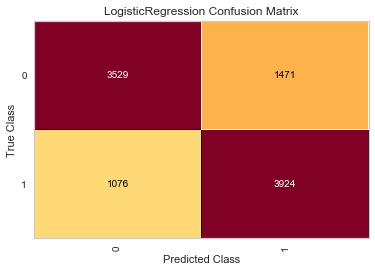

In [58]:
model = LogisticRegression(random_state=1)

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=y_train.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(reduced_vectors_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(reduced_vectors_test, y_test)

# How did we do?
cm.poof()

In [59]:
#training score
classifier.score(X=reduced_vectors_train,y=y_train) #accuracy

0.750175

In [60]:
predicted_labels=classifier.predict(reduced_vectors_train)
names=y_test.unique()

In [61]:
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))
#training score end

              precision    recall  f1-score   support

           0       0.77      0.72      0.74     20000
           1       0.73      0.78      0.76     20000

    accuracy                           0.75     40000
   macro avg       0.75      0.75      0.75     40000
weighted avg       0.75      0.75      0.75     40000



# SVM using Gradient Descent

In [62]:
classifier_svm=SGDClassifier(loss='hinge', penalty='l2', random_state=1,max_iter=1000)

In [63]:
classifier_svm.fit(X=reduced_vectors_train,y=y_train)
classifier_svm.score(X=reduced_vectors_test,y=y_test)

0.7362

In [64]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)

In [65]:
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      5000
           1       0.70      0.82      0.76      5000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000



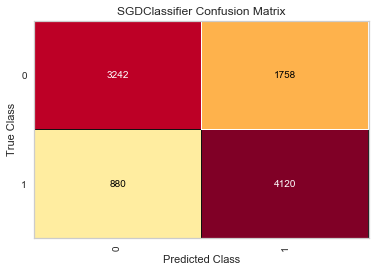

In [66]:
model = SGDClassifier(loss='hinge', penalty='l2', random_state=1,max_iter=1000)

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=y_train.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(reduced_vectors_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(reduced_vectors_test, y_test)
         
# How did we do?
cm.poof()

In [67]:
#training score
classifier_svm.score(X=reduced_vectors_train,y=y_train) 



0.741575

In [68]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)
names=y_test.unique()

In [69]:
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))
#training score end

              precision    recall  f1-score   support

           0       0.79      0.65      0.72     20000
           1       0.71      0.83      0.76     20000

    accuracy                           0.74     40000
   macro avg       0.75      0.74      0.74     40000
weighted avg       0.75      0.74      0.74     40000



# Kernel SVM 

In [70]:
from sklearn.svm import SVC
classifier_svm=SVC( kernel="poly", random_state=1,max_iter=1000)


In [46]:
classifier_svm.fit(reduced_vectors_train,y_train) #too slow

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=1000, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
classifier_svm.score(reduced_vectors_test,y_test)

0.4999

In [48]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.33      0.00      0.00      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.42      0.50      0.33     10000
weighted avg       0.42      0.50      0.33     10000



In [49]:
classifier_svm.score(reduced_vectors_train,y_train)

0.50005

In [50]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.60      0.00      0.00     20000
           1       0.50      1.00      0.67     20000

    accuracy                           0.50     40000
   macro avg       0.55      0.50      0.33     40000
weighted avg       0.55      0.50      0.33     40000



In [51]:
classifier_svm=SVC(kernel="rbf", random_state=1,max_iter=1000)
classifier_svm.fit(reduced_vectors_train,y_train)
classifier_svm.score(reduced_vectors_test,y_test)

0.5516

In [52]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.79      0.14      0.24      5000
           1       0.53      0.96      0.68      5000

    accuracy                           0.55     10000
   macro avg       0.66      0.55      0.46     10000
weighted avg       0.66      0.55      0.46     10000



In [53]:
classifier_svm.score(reduced_vectors_train,y_train)

0.546275

In [54]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.80      0.12      0.21     20000
           1       0.53      0.97      0.68     20000

    accuracy                           0.55     40000
   macro avg       0.66      0.55      0.45     40000
weighted avg       0.66      0.55      0.45     40000



# Nb

In [71]:
classifierNB=MultinomialNB()

In [72]:
classifierNB.fit(X=reduced_vectors_train,y=y_train)
classifierNB.score(X=reduced_vectors_test,y=y_test)

0.7362

In [73]:
predicted_labels=classifierNB.predict(reduced_vectors_test)

print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      5000
           1       0.72      0.77      0.74      5000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



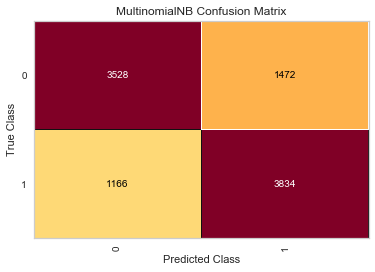

In [74]:
model = MultinomialNB()

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=y_train.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(reduced_vectors_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(reduced_vectors_test, y_test)

# How did we do?
cm.poof()

In [75]:
#training score
classifierNB.score(X=reduced_vectors_train,y=y_train)

0.737375

In [76]:
predicted_labels=classifierNB.predict(reduced_vectors_train)
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     20000
           1       0.73      0.76      0.74     20000

    accuracy                           0.74     40000
   macro avg       0.74      0.74      0.74     40000
weighted avg       0.74      0.74      0.74     40000

